In [1]:
import kagglehub
import pandas as pd
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")
import numpy as np

# https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/eva/.cache/kagglehub/datasets/maharshipandya/-spotify-tracks-dataset/versions/1


In [2]:
df = pd.read_csv("/Users/eva/.cache/kagglehub/datasets/maharshipandya/-spotify-tracks-dataset/versions/1/dataset.csv")
df = df.drop("Unnamed: 0", axis=1)
print("Shape: ", df.shape)
display(df.columns)
display(df.head())

Shape:  (114000, 20)


Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [4]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [5]:
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

## Exploring columns of interest:

#### Distribution:

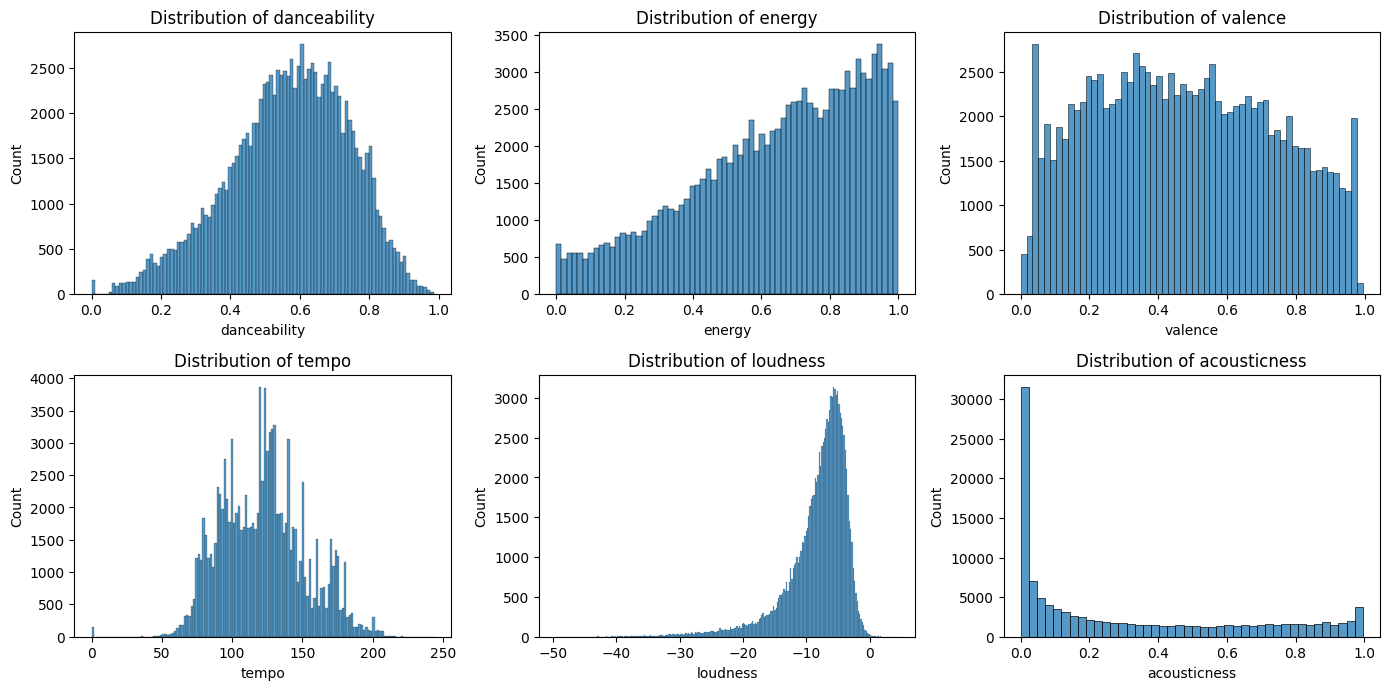

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['danceability','energy','valence','tempo','loudness','acousticness']

plt.figure(figsize=(14,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=False)   # disable KDE to avoid pandas option error
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

#### Correlation:

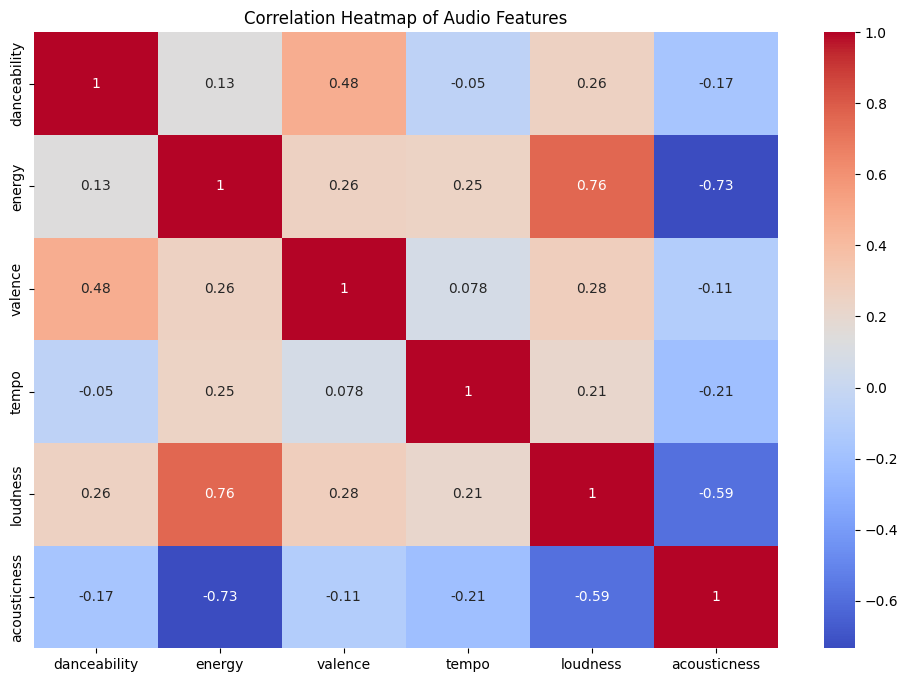

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Audio Features")
plt.show()

#### Relationship to "popularity"

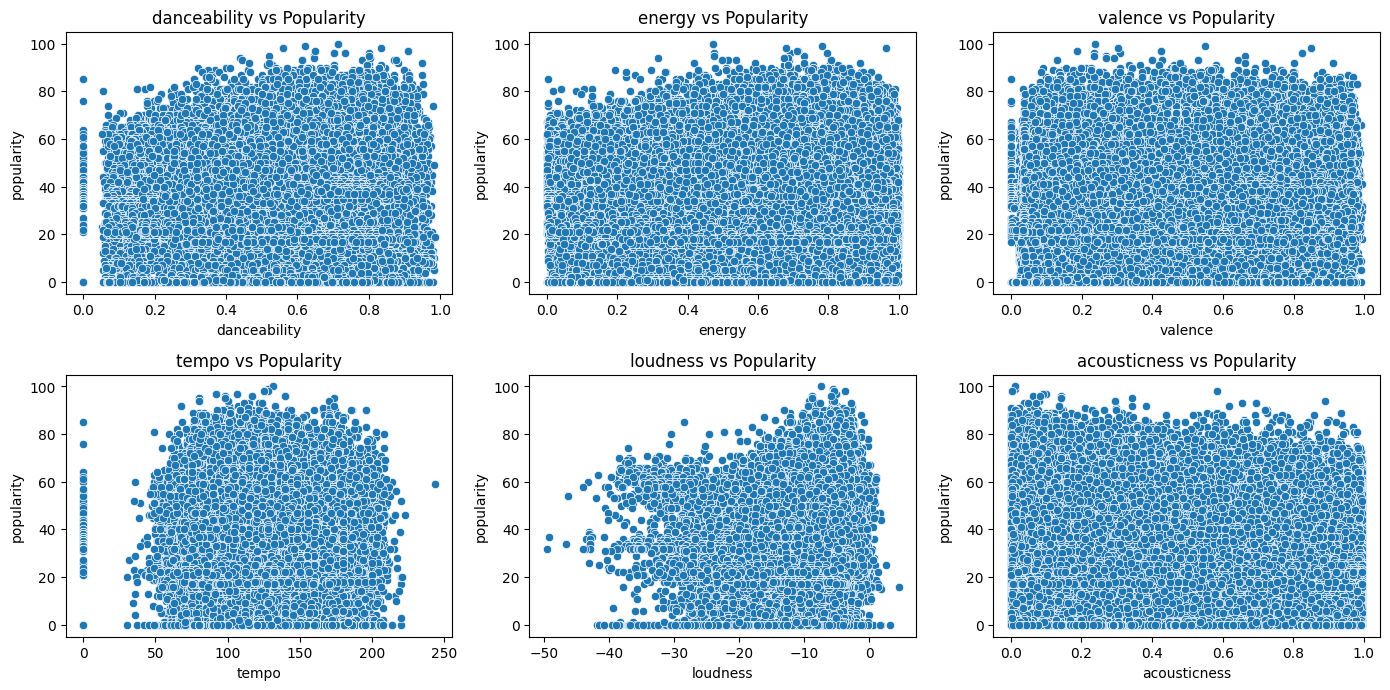

In [8]:
plt.figure(figsize=(14,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[col], y=df['popularity'])
    plt.title(f"{col} vs Popularity")
plt.tight_layout()
plt.show()

Creating a baseline idea and checking it:

In [9]:
df['duration_min'] = df['duration_ms']/60000
df = df.drop('duration_ms', axis=1)
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'duration_min'],
      dtype='object')

In [10]:
features = ['popularity', 'duration_min', 'explicit', 'danceability', 
            'energy', 'key', 'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness',
            'valence', 'tempo', 'time_signature']

In [11]:
X = df[features].copy()
X.head()

,popularity,duration_min,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,3.844433,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,2.493500,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,3.513767,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,3.365550,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,3.314217,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [12]:
numerical_features = [
    'popularity', 'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 
    'tempo', 'duration_min'
]

hot_features = ['key', 'time_signature']

bool_features = ['explicit']

transformer = ColumnTransformer(
        transformers=[
            ('num_scaler', StandardScaler(), numerical_features),
            ('one_hot', OneHotEncoder(), hot_features),
            ('boolean', StandardScaler(), bool_features)
        ],
        remainder='passthrough'
)

X_transformed = transformer.fit_transform(X)
print(X_transformed.shape)

(114000, 30)


In [13]:
print(X_transformed.shape)
print(np.isnan(X_transformed).sum()) 

(114000, 30)
0


We create a basic linear regression model to see how it performs and get an idea:

In [14]:
numerical_features_2 = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 
    'tempo', 'duration_min'
]

base_transformer = ColumnTransformer(
        transformers=[
            ('num_scaler', StandardScaler(), numerical_features_2),
            ('one_hot', OneHotEncoder(), hot_features),
            ('boolean', StandardScaler(), bool_features)
        ],
        remainder='passthrough'
)

base_X = X.drop('popularity', axis=1)
base_X_transformed = base_transformer.fit_transform(base_X)
y = X['popularity']

X_train, X_test, y_train, y_test = train_test_split(
    base_X_transformed, y, test_size=0.2, random_state=42
)

# Train baseline model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Generate predictions
y_pred = lr.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
mse

483.63763316371984

Get feature strength:

In [15]:
transformer.named_transformers_['num_scaler'].get_feature_names_out().tolist()

['popularity',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_min']

In [16]:
feature_names = (
    transformer.named_transformers_['num_scaler'].get_feature_names_out().tolist()
    + transformer.named_transformers_['one_hot'].get_feature_names_out().tolist()
    + bool_features
)

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': lr.coef_
})

# Sort by absolute strength
coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

coef_df

,feature,coefficient,abs_coef
25,time_signature_3,1.205814e+14,1.205814e+14
26,time_signature_4,1.205814e+14,1.205814e+14
24,time_signature_1,1.205814e+14,1.205814e+14
23,time_signature_0,1.205814e+14,1.205814e+14
22,key_11,1.205814e+14,1.205814e+14
14,key_3,5.787275e+13,5.787275e+13
13,key_2,5.787275e+13,5.787275e+13
15,key_4,5.787275e+13,5.787275e+13
12,key_1,5.787275e+13,5.787275e+13
21,key_10,5.787275e+13,5.787275e+13
